# <H1><center>**Capstone Project 3 - Travel Insurance Claim Prediction**
# <H4><center>**By Hafidh Diya Ulhaqi Dewantoro**
---
---

## **1. Business Problem & Data Understanding**

### **Background**

Travel insurance has become an integral part of travel plans for many modern travelers. With increasing awareness of the risks associated with traveling, such as accidents, sudden illness, or lost luggage, the demand for insurance protection during travel is on the rise. One key aspect of travel insurance services is its ability to handle claims quickly and efficiently when emergencies occur.

Insurance claims are a vital process whereby policyholders apply for compensation for losses or damages incurred during the journey covered by the insurance policy. This can include everything from unexpected medical treatment costs to the replacement of lost travel expenses due to sudden cancellations. A company's ability to effectively manage claims is a key factor in determining customer satisfaction and building a solid reputation in the market.

Target :

0 : Did not File a Claim

1 : File a Claim

### **Problem Statement**

In the context of travel insurance, the main challenge faced is determining whether a traveler will file an insurance claim or not when an emergency situation occurs during the journey. This requires accurate assessment of the situation, the traveler's needs and desires, as well as the ability to provide appropriate services and assistance in a timely manner. Therefore, the core issue is how to identify and understand the factors influencing an individual's decision to file a travel insurance claim, enabling insurance companies to design more effective strategies and processes in handling these claims.

### **Goals**

Developing a predictive model that can estimate whether a customer will file an insurance claim or not during a specific period.

### **Analytic Approach** 

1. Data Analysis for Pattern Identification:
   
   - Collecting and analyzing historical customer data, including information on submitted and non-submitted insurance claims.
   
   - Utilizing data analysis techniques such as descriptive statistical analysis, correlation analysis, and data visualization to identify patterns or differences in behavior or characteristics between policyholders who file claims and those who do not.

2. Predictive Model Development:
   
   - Building predictive models using machine learning techniques such as logistic regression, decision trees, or ensemble algorithms like Random Forest.
   
   - Training the model using processed historical data to predict the probability of a policyholder filing an insurance claim or not in the future.

3. Model Validation and Evaluation:
   
   - Using evaluation metrics such as accuracy, precision, recall, and area under the curve (AUC) to assess model performance.
   
   - Validating the model using cross-validation techniques to ensure good generalization to new data.

4. Implementation and Optimization:
   
   - Implementing the detection model into the company's information system to support decision-making in risk management and insurance claim processes.
   
   - Performing model optimization periodically by updating customer data and adjusting model parameters to enhance prediction performance.

### **Evaluation Metrics**

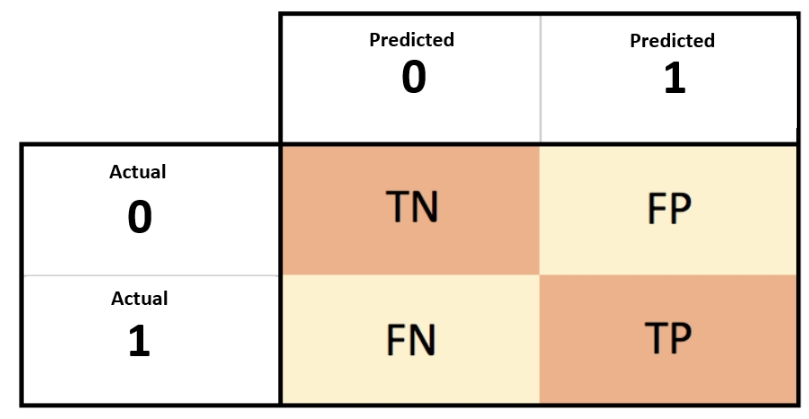

- TP: The model predicts prospective travelers who make claims to make claims.
    
- TN: The model predicts that prospective travelers who do not make a claim will not make a claim.
    
- FP: The model predicts that prospective travelers who do not make a claim will make a claim.
    
- FN: The model predicts that prospective travelers who make claims will not make claims.

There are 2 types of errors:

- Type 1 error: **False Positive**

    Consequence: wastage of time, resources, and company performance in handling insurance claims that are not actually needed. This can cause discomfort and unnecessary burden for policyholders and the company.

- Type 2 error: **False Negative**

    Consequence: a decrease in the quality of insurance services because policyholders who actually deserve to receive claims do not get them. This can result in customer dissatisfaction, loss of trust, and even serious financial impacts for policyholders affected by events not covered by insurance.

Based on the consequences above, the primary effort we will undertake is to develop a detection model that can minimize the False Negative rate.

In the context of minimizing the False Negative rate, the main focus will be on the **Recall Score**. The recall score measures the model's ability to identify all positive cases correctly, or in this case, the ability to identify all cases where policyholders will actually file insurance claims.

By using the recall score as the primary metric, the main goal of the detection model is to ensure that as many actual positive cases (policyholders who will file claims) are detected by the model. This will help minimize the number of False Negatives, which in turn will reduce the risk of decreasing the quality of insurance services and increase customer satisfaction.

### **Project Limitations**

One limitation of this project stems from the inherent difficulty in managing an imbalanced dataset, which adds complexity to optimizing the balance between recall and precision in our classification model.

### **Data Understanding**

The problem to be addressed is improving efficiency in handling travel insurance claims through understanding claim submission patterns. By analyzing the "Travel Insurance" dataset, which includes historical information on insurance users who have filed claims, the main goal is to identify factors influencing users' decisions to file claims. The focus is on enhancing the company's ability to predict who is likely to file a claim, thus enabling improved timely and efficient responses.

Dataset Source: [Travel Insurance Dataset](https://drive.google.com/file/d/1emDTGFvku7UuuVT3W-EmEvg3i61QrIU-/view?usp=drive_link)

#### **Features Information**



| Features              | Description                                            | Data Type |
|-----------------------|--------------------------------------------------------|-----------|
| Agency                | Name of the agency.                                    | object    |
| Agency Type           | Type of travel insurance agency.                       | object    |
| Distribution Channel  | Distribution channel of the travel insurance agency.  | object    |
| Product Name          | Name of the travel insurance product.                  | object    |
| Gender                | Gender of the insured.                                 | object    |
| Duration              | Duration of the travel.                                | int64     |
| Destination           | Destination of the travel.                             | object    |
| Net Sales             | Total sales amount of the travel insurance policy.     | float64   |
| Commission (in value) | Commission received for the travel insurance agency.   | float64   |
| Age                   | Age of the insured.                                    | int64     |
| **Claim**             | **Claim status (Target)**                              | object    |

Note:

- The dataset is imbalanced.

- There are features that are categorical and numerical.

- Each row of data represents information about a policyholder with travel history data.

## **2. Data Preparation**

#### **Import Library**

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate

# Model Selection
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


# Imbalanced Dataset Handling
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

# Evaluation Metrics & Confusion Matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Hyperparamater Tuning
from sklearn.model_selection import GridSearchCV

# Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

#### **Load Dataset**

In [250]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


#### **Dataset Description**

In [251]:
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.00,16,"[CWT, C2B]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Basic Plan, Single Trip Travel Protect Platinum]"
4,Gender,object,31647,71.39,2,"[M, nan]"
5,Duration,int64,0,0.00,437,"[212, 77]"
6,Destination,object,0,0.00,138,"[RWANDA, MALI]"
7,Net Sales,float64,0,0.00,1006,"[126.75, 200.0]"
8,Commision (in value),float64,0,0.00,915,"[18.24, 20.48]"
9,Age,int64,0,0.00,89,"[48, 31]"


In [252]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


**Insights:** 

- Among all columns, only the "Gender" column has NaN data, totaling 31,647 entries.
  
- Based on descriptive statistics, the maximum value in the "Duration" column is 4,881. This value needs to be considered as an outlier.

- Numerical Features:

    - Duration
    
    - Net Sales
    
    - Commission (in value)
    
    - Age

- Categorical Features:

    - Agency
    
    - Agency Type
    
    - Distribution Channel
    
    - Product Name
    
    - Gender
    
    - Destination

- Target: **Claim**

    - No: 0
    
    - Yes: 1

## **3. EDA (Exploratory Data Analysis)**

Before embarking on building a predictive model, an important step to take is conducting Exploratory Data Analysis (EDA). EDA helps us to gain a deeper understanding of the data to be used.

EDA aims to understand the characteristics and structure of the data, as well as identifying patterns, anomalies, or trends present in the data. By performing EDA, data analysts can gain better insights into the data they have before cleaning it.

### **Numerical Feature**

#### **Box Plot & Histogram of Numerical Features**

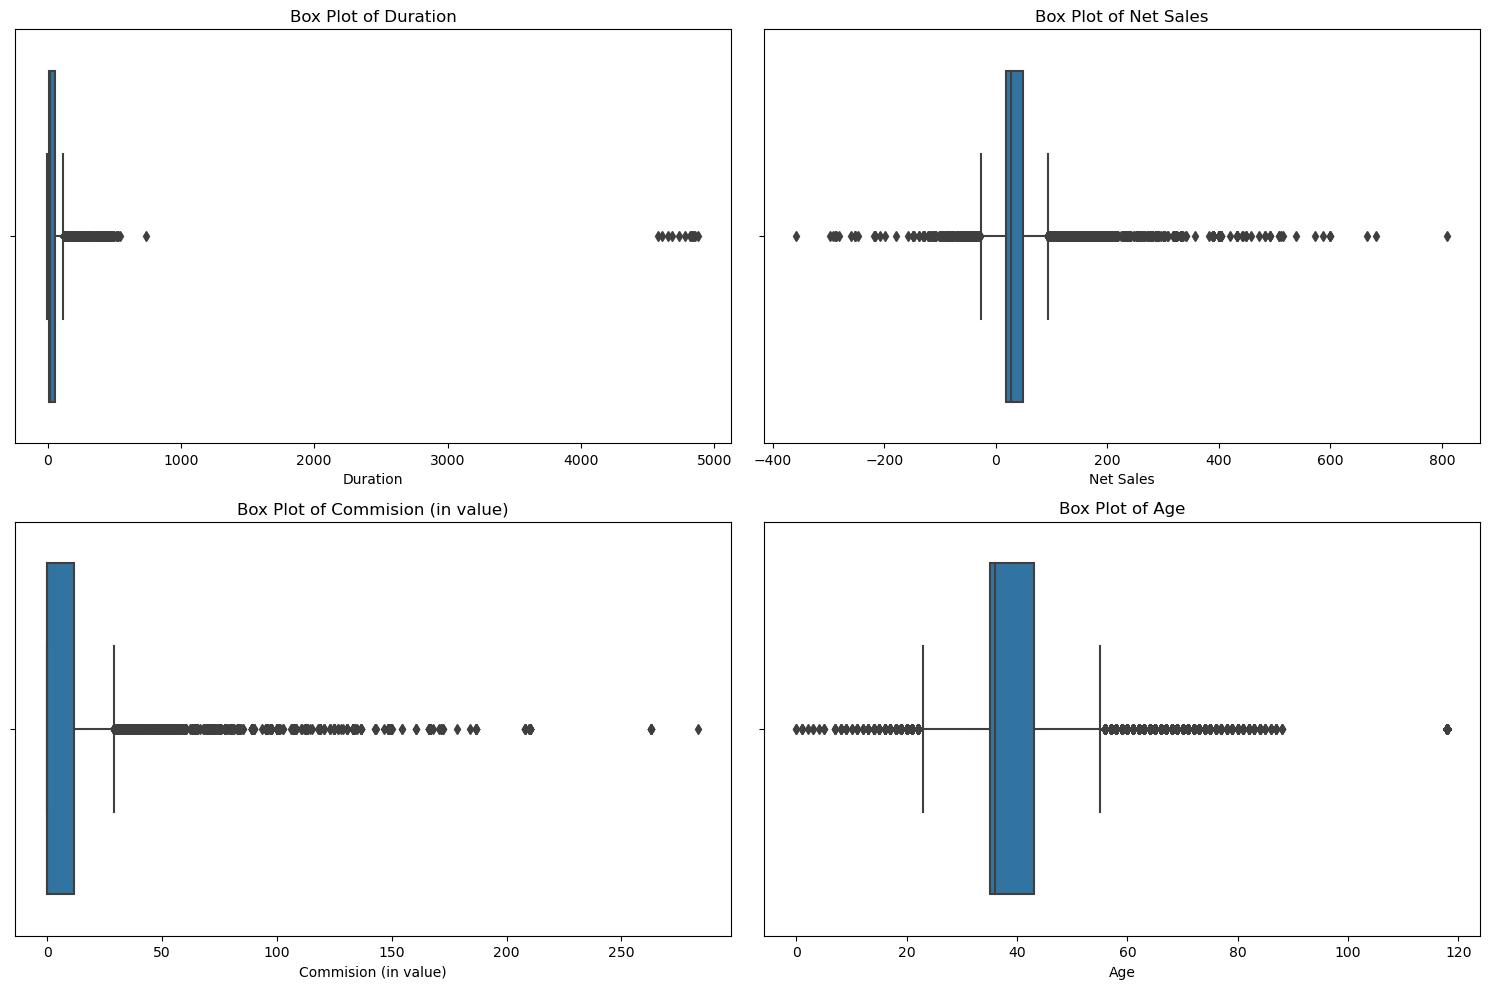

In [253]:
# Creating box plots for the numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for 'Duration'
sns.boxplot(data=df, x='Duration', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Duration')

# Box plot for 'Net Sales'
sns.boxplot(data=df, x='Net Sales', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Net Sales')

# Box plot for 'Commision (in value)'
sns.boxplot(data=df, x='Commision (in value)', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Commision (in value)')

# Box plot for 'Age'
sns.boxplot(data=df, x='Age', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Age')

plt.tight_layout()
plt.show()

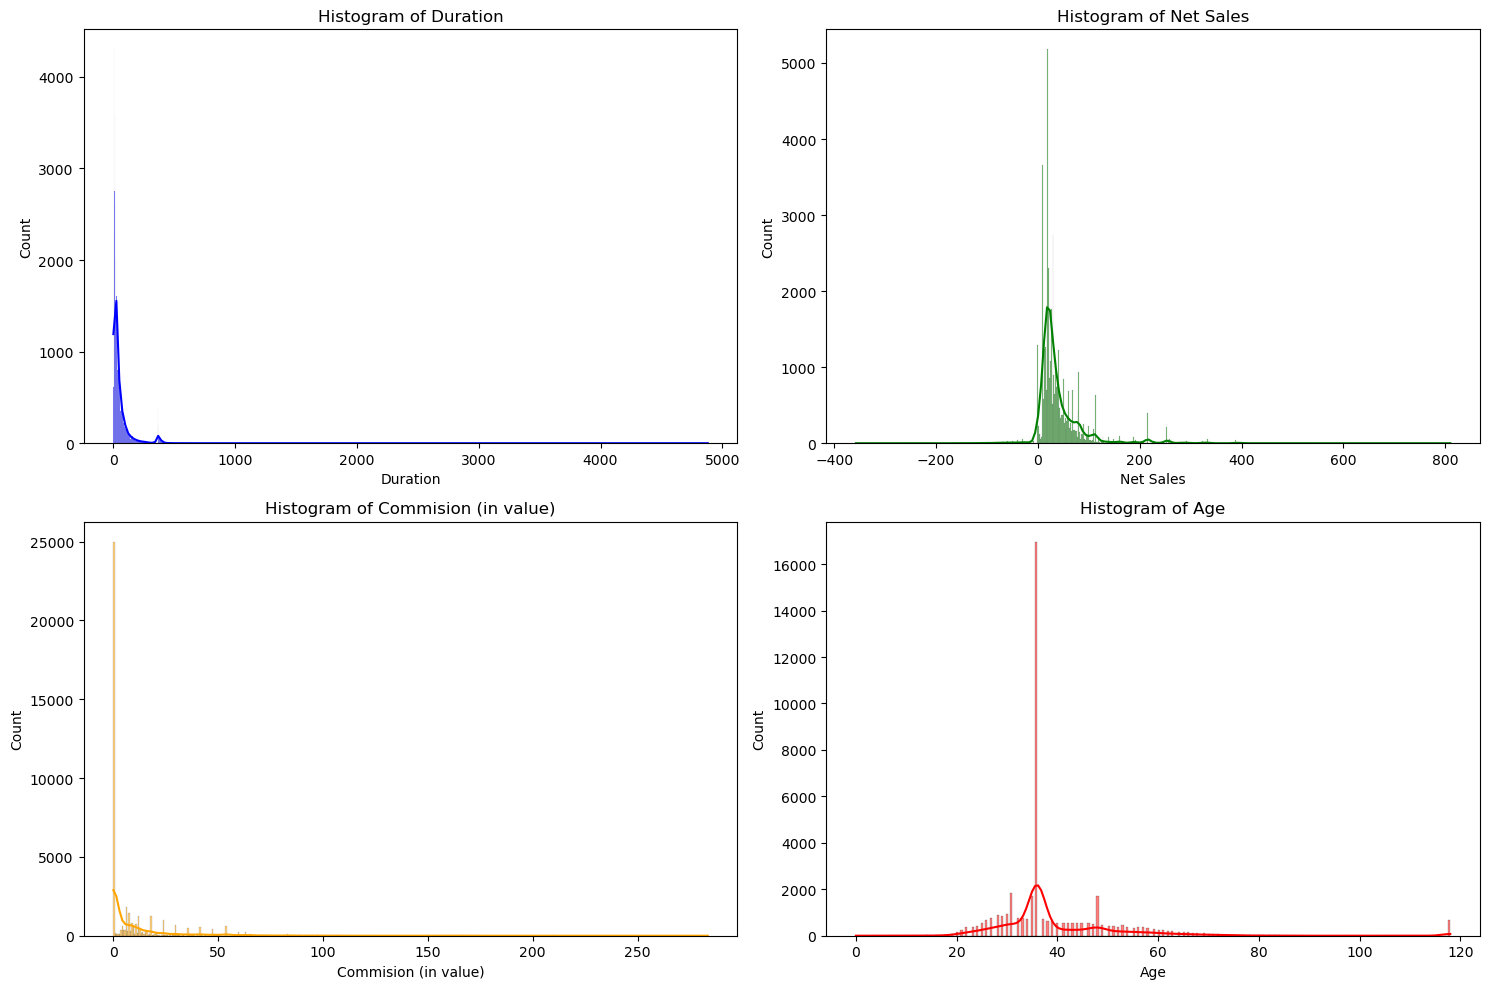

In [254]:
# Creating histograms for the numerical features with shadow
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram for 'Duration'
sns.histplot(data=df, x='Duration', ax=axes[0, 0], kde=True, color='blue', alpha=0.5)
axes[0, 0].set_title('Histogram of Duration')

# Histogram for 'Net Sales'
sns.histplot(data=df, x='Net Sales', ax=axes[0, 1], kde=True, color='green', alpha=0.5)
axes[0, 1].set_title('Histogram of Net Sales')

# Histogram for 'Commision (in value)'
sns.histplot(data=df, x='Commision (in value)', ax=axes[1, 0], kde=True, color='orange', alpha=0.5)
axes[1, 0].set_title('Histogram of Commision (in value)')

# Histogram for 'Age'
sns.histplot(data=df, x='Age', ax=axes[1, 1], kde=True, color='red', alpha=0.5)
axes[1, 1].set_title('Histogram of Age')

plt.tight_layout()
plt.show()


#### **Check Correlation between Numerical Features**

In [255]:
# Calculate the correlation between numerical features
correlation_matrix = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].corr()
correlation_matrix

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.392636,0.315283,0.005042
Net Sales,0.392636,1.000000,0.647442,0.039393
Commision (in value),0.315283,0.647442,1.000000,0.118546
Age,0.005042,0.039393,0.118546,1.000000


The table shows the correlation matrix between the numerical features: Duration, Net Sales, Commission (in value), and Age.

- Duration has a moderate positive correlation with Net Sales (0.392) and Commission (in value) (0.315), indicating that longer durations of travel tend to result in higher net sales and commissions.

- Net Sales has a strong positive correlation with Commission (in value) (0.647), suggesting that higher net sales typically lead to higher commission amounts.

- Age has very weak correlations with the other features, indicating little to no linear relationship between age and the other numerical variables.

Overall, the correlation matrix provides insights into the relationships between the numerical features in the dataset.

#### **Check Multicolinearity**

In [256]:
# Check VIF Numerical on DF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_vif(x):

    vif = pd.DataFrame()
    vif['variables'] = x.columns    #_
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 10, 'Yes', 'No')

    return (vif)

In [257]:
calc_vif(df[['Duration', 'Age']])

,variables,VIF,Acceptable
0,Duration,1.180363,Yes
1,Age,1.180363,Yes


In [258]:
calc_vif(df[['Duration', 'Commision (in value)']])

,variables,VIF,Acceptable
0,Duration,1.240516,Yes
1,Commision (in value),1.240516,Yes


In [259]:
calc_vif(df[['Age', 'Commision (in value)']])

,variables,VIF,Acceptable
0,Age,1.259058,Yes
1,Commision (in value),1.259058,Yes


In [260]:
calc_vif(df[['Commision (in value)', 'Net Sales']])

,variables,VIF,Acceptable
0,Commision (in value),2.138592,Yes
1,Net Sales,2.138592,Yes


The tables display the Variance Inflation Factor (VIF) for pairs of variables in the dataset. VIF is a measure used to detect multicollinearity among predictor variables in a regression analysis. 

In each table:
- The "variables" column lists the pair of variables being analyzed.
- The "VIF" column shows the VIF value calculated for each variable pair.
- The "Acceptable" column indicates whether the VIF value is within an acceptable range.

Interpretation:
1. The first table shows the VIF values for Duration and Age, both of which are below 5, indicating low multicollinearity. Hence, they are acceptable.
2. The second table shows the VIF values for Duration and Commission (in value), both of which are below 5, indicating low multicollinearity. Hence, they are acceptable.
3. The third table shows the VIF values for Age and Commission (in value), both of which are below 5, indicating low multicollinearity. Hence, they are acceptable.
4. The fourth table shows the VIF values for Commission (in value) and Net Sales, both of which are below 5, indicating low multicollinearity. Hence, they are acceptable.

Overall, the VIF values suggest that there is no significant multicollinearity among the predictor variables in each pair.

### **Categorical Feature**

#### **Brief Data Analysis of Categorical Features**

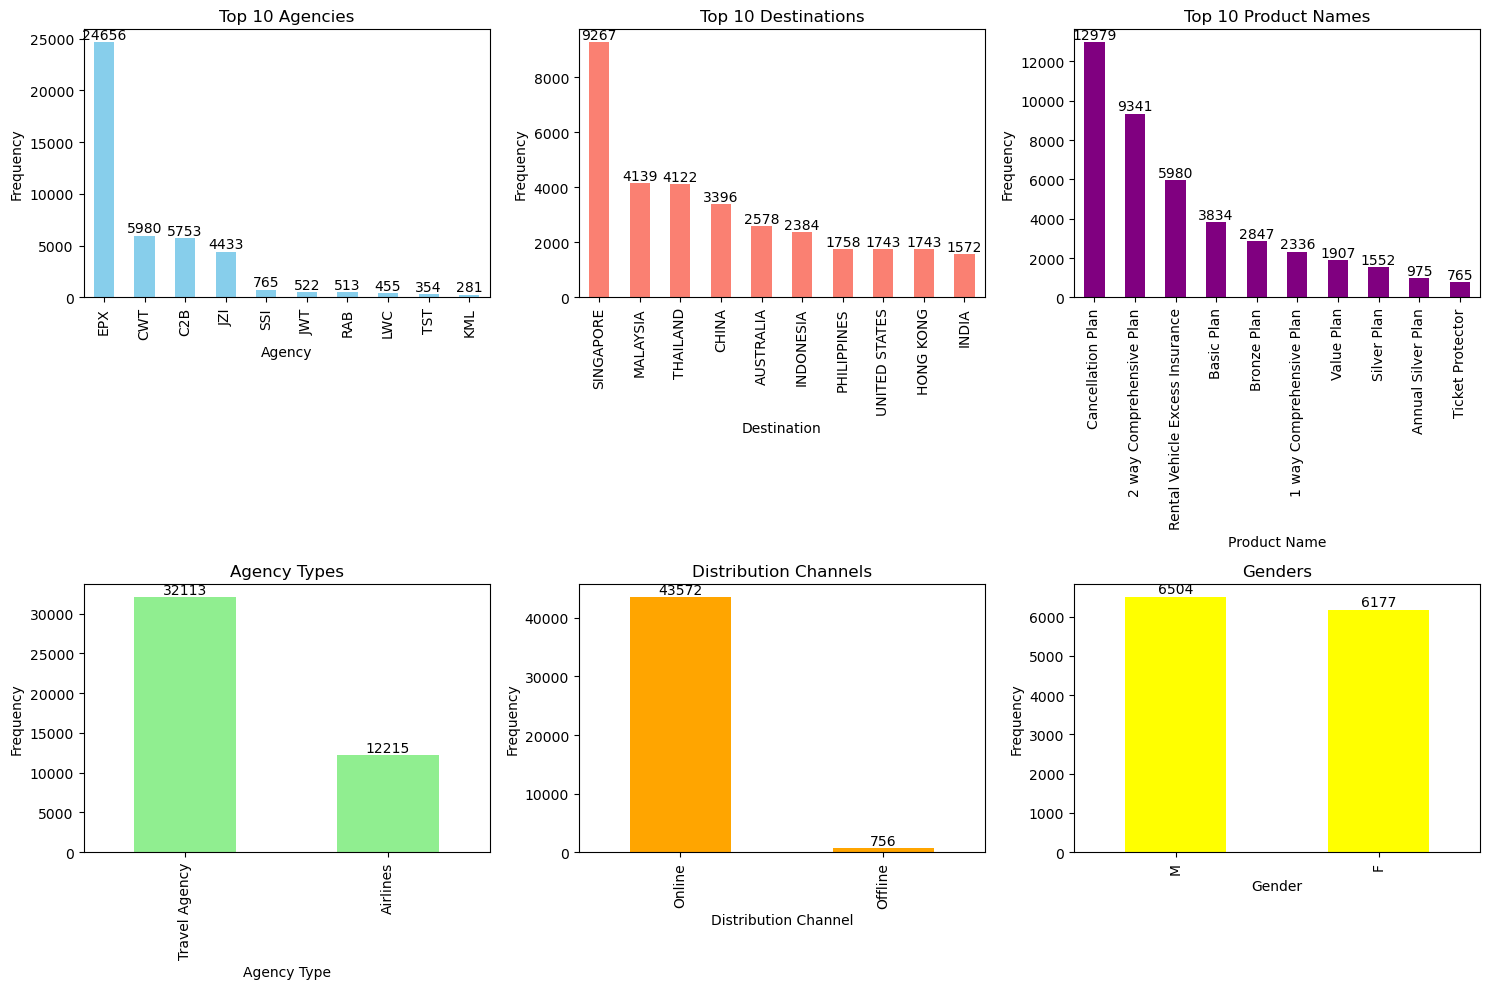

In [261]:
# Take the top 10 data from the columns Agency, Destination, and Product Name
top_agency = df['Agency'].value_counts().head(10)
top_destination = df['Destination'].value_counts().head(10)
top_product_name = df['Product Name'].value_counts().head(10)

# Create subplots for the features Agency, Destination, and Product Name
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
top_agency.plot(kind='bar', color='skyblue')
plt.title('Top 10 Agencies')
plt.xlabel('Agency')
plt.ylabel('Frequency')
for i, v in enumerate(top_agency):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 2)
top_destination.plot(kind='bar', color='salmon')
plt.title('Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Frequency')
for i, v in enumerate(top_destination):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 3)
top_product_name.plot(kind='bar', color='purple')
plt.title('Top 10 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
for i, v in enumerate(top_product_name):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Take data for the features Agency Type, Distribution Channel, and Gender
agency_type_counts = df['Agency Type'].value_counts()
distribution_counts = df['Distribution Channel'].value_counts()
gender_counts = df['Gender'].value_counts()

# Create subplots for the features Agency Type, Distribution Channel, and Gender
plt.subplot(2, 3, 4)
agency_type_counts.plot(kind='bar', color='lightgreen')
plt.title('Agency Types')
plt.xlabel('Agency Type')
plt.ylabel('Frequency')
for i, v in enumerate(agency_type_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 5)
distribution_counts.plot(kind='bar', color='orange')
plt.title('Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
for i, v in enumerate(distribution_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.subplot(2, 3, 6)
gender_counts.plot(kind='bar', color='yellow')
plt.title('Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
for i, v in enumerate(gender_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Insights:**

1. Agency:
   
   - EPX is the top agency with the highest number of policies, almost four times that of the second agency (CWT).
   
   - Most policies are purchased through major agencies like EPX, CWT, and C2B.

2. Destination:
   
   - Singapore is the top destination for travel insurance, followed by Thailand and Malaysia.
   
   - Most popular destinations are Asian countries, but Australia and the United States are also included.

3. Product Name:
   
   - Cancellation Plan is the most popular product, followed by 2 Way Comprehensive Plan and Rental Vehicle Excess Insurance.
   
   - These key products may indicate common needs among customers.

4. Agency Type:
   
   - More policies are purchased through travel agencies than airlines.
   
   - This may suggest that travel agencies are more dominant in selling travel insurance.

5. Distribution Channel:
   
   - Online purchases may be more popular due to their convenience and accessibility for most customers in this digital age.
   
   - Offline channels may be used by a small percentage of customers who prefer direct transactions.

6. Gender:
   
   - There is a slight difference in the number of policies purchased by males and females, with males slightly more than females.
   
   - This difference may not be significant in the context of travel insurance purchases.

#### **Check Cardinality**

In [262]:
# Checking the cardinality (number of unique values) in each categorical column
cardinality_check = df.select_dtypes(include=['object']).nunique()

print(cardinality_check)

Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Gender                    2
Destination             138
Claim                     2
dtype: int64


The cardinality results provide information about the number of unique categories or levels within each categorical variable:

1. **Agency:** 
   - Since there are 16 unique agencies, it may considers encoding this categorical variable using techniques like binary encoding as highly unique values.

2. **Agency Type:** 
   - With only 2 unique types, it can directly encodes this variable into binary values (e.g., 0 and 1) using one-hot encoding.

3. **Distribution Channel:** 
   - Similarly, with 2 unique channels, you can encode this variable into one-hot encoding.

4. **Product Name:** 
   - With 26 unique product names, you might face challenges with binary encoding due to the high dimensionality it would introduce. Consider techniques like frequency or target encoding to handle this variable efficiently.

5. **Destination:** 
   - With 137 unique destinations, encoding this variable using binary encoding could lead to high dimensionality. You may explore grouping less frequent destinations or using target encoding to manage this variable.

6. **Age Range:** 
   - With 6 unique age ranges, it can directly encodes this variable using label encoding or create dummy variables if required.

## **4. Data Cleaning**

### **Changing Data Type in Target Column**

In [263]:
# Change the 'Claim' column values to 0 for not claimed and 1 for claimed
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
df['Claim'].value_counts()

Claim
0    43651
1      677
Name: count, dtype: int64

The interpretation of the data provided is as follows:

- There are 43,651 instances where insurance claims were not filed (Claim = 0).
- There are 677 instances where insurance claims were filed (Claim = 1).

This indicates that the dataset is imbalanced, with a significantly larger number of instances where claims were not filed compared to instances where claims were filed. Imbalanced datasets like this may require special attention during model training to ensure that the model can effectively learn patterns from both classes and make accurate predictions. Techniques such as resampling, adjusting class weights, or using appropriate evaluation metrics can be employed to address imbalanced data.

In [264]:
# Rename the column 'Commision (in value)' to 'Commision'
df = df.rename(columns = {'Commision (in value)':'Commision'})
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,0


### **Missing Values**

Based on the previous insight, there are 71.39% or 31,647 missing values in the 'Gender' column. Due to the large amount of missing data, it is advisable to simply delete the column.

<Axes: >

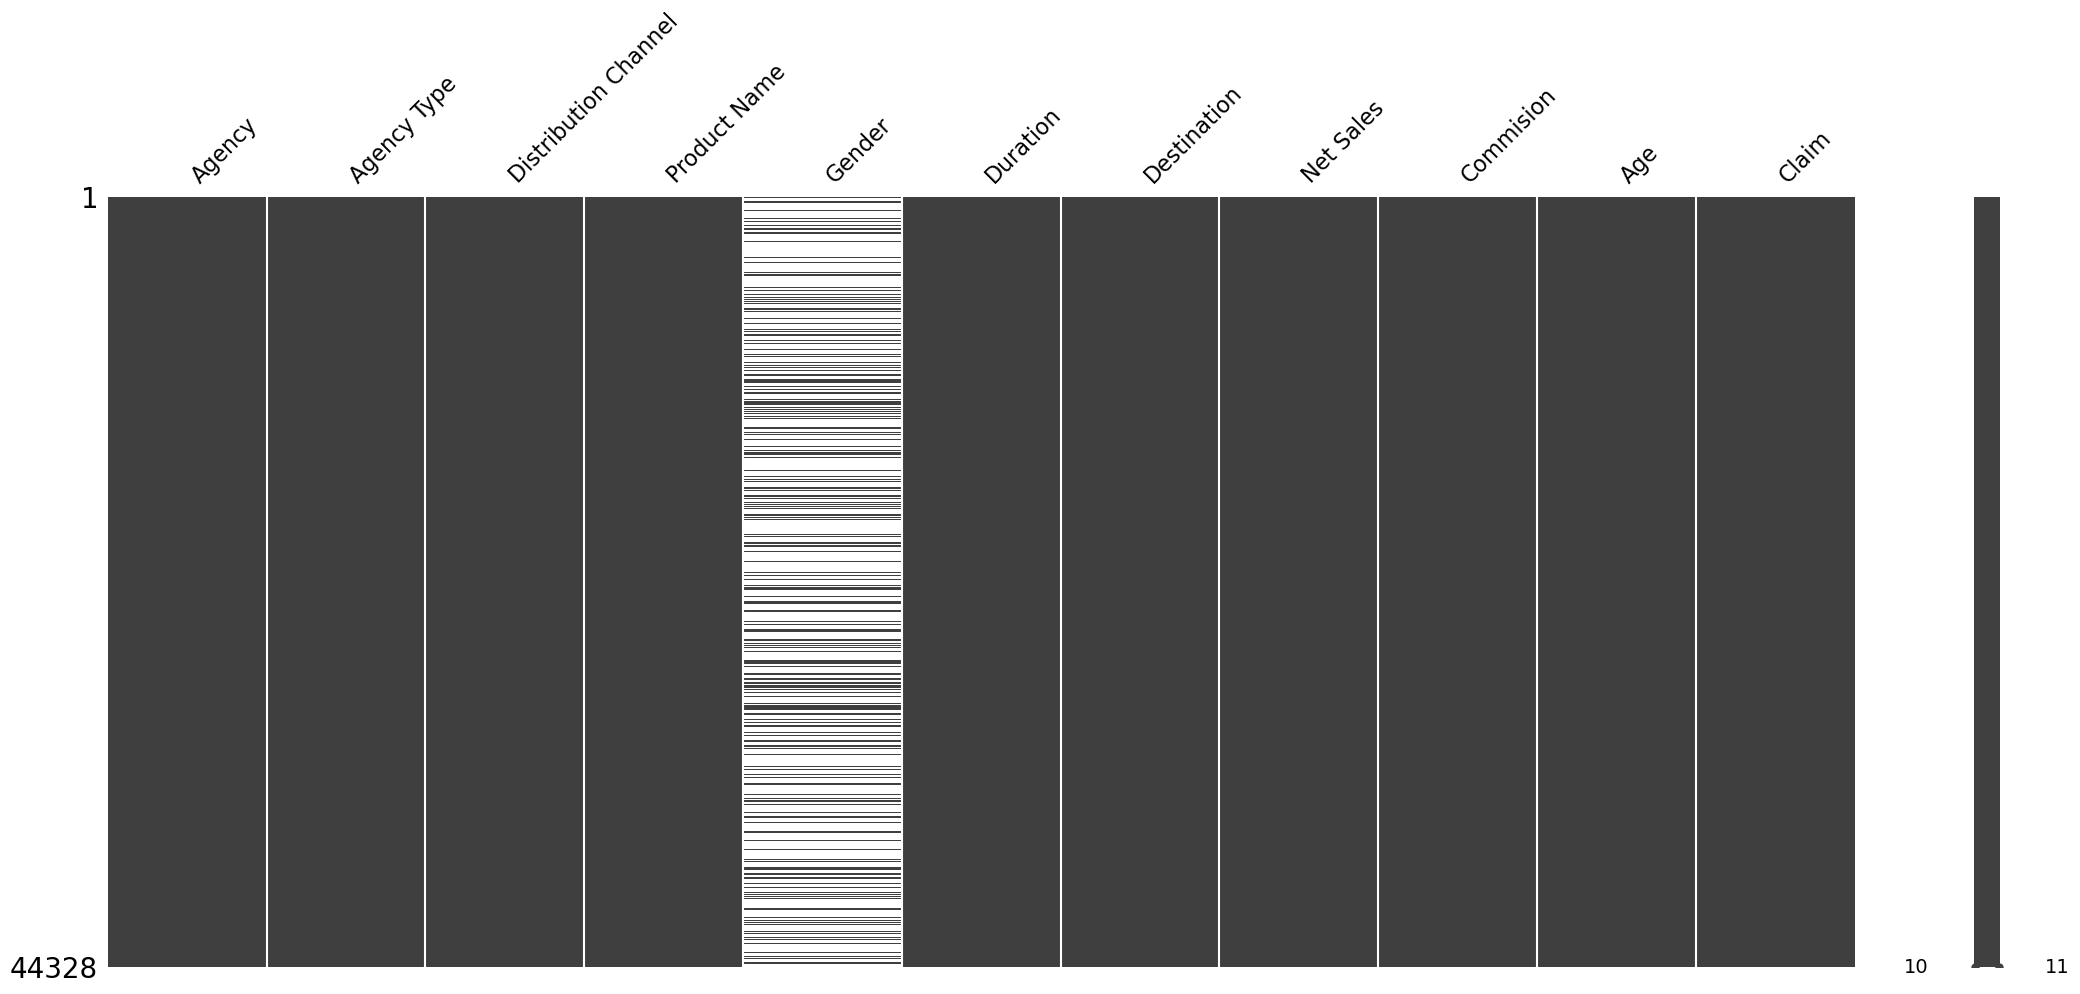

In [265]:
missingno.matrix(df)

In [266]:
# Drop the 'Gender' Column
df = df.drop(['Gender'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


### **Duplicated Data**

In [267]:
# Check duplicated data
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,0
360,EPX,Travel Agency,Online,Cancellation Plan,6,MALAYSIA,10.0,0.00,36,0
473,EPX,Travel Agency,Online,Cancellation Plan,11,MALAYSIA,10.0,0.00,36,0
488,EPX,Travel Agency,Online,Cancellation Plan,2,SINGAPORE,10.0,0.00,36,0
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,3,MALAYSIA,20.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,49,VIET NAM,20.0,0.00,36,0
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,5,THAILAND,29.7,17.82,38,0
44313,EPX,Travel Agency,Online,Cancellation Plan,5,CHINA,14.0,0.00,36,0
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,5,THAILAND,20.0,0.00,36,0


In [268]:
# Drop data duplicates
df.drop_duplicates(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check for any remaining duplicates
n_duplicates = df.duplicated().sum()

# Check the new shape of the DataFrame
new_shape = df.shape

# Output the number of duplicates and the new DataFrame shape
print("Number of duplicates:", n_duplicates)
print("New DataFrame shape:", new_shape)

Number of duplicates: 0
New DataFrame shape: (39324, 10)


### **Outliers**

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,39324.0,52.275989,113.404932,-1.0,11.0,25.0,57.00,4881.0
Net Sales,39324.0,42.202530,49.704030,-357.5,19.0,29.0,50.00,810.0
Commision,39324.0,10.386189,20.345275,0.0,0.0,0.0,11.88,283.5
Age,39324.0,39.833054,13.225494,0.0,35.0,36.0,44.00,118.0
Claim,39324.0,0.017114,0.129699,0.0,0.0,0.0,0.00,1.0


**Insight:**

- There are negative values in the Duration and Net Sales columns.

- Outlier detection is necessary for each numerical feature for those who file insurance claims.

#### Handling Outliers in `Duration` 

In [270]:
df['Duration'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Duration
index,
count,39324.000000
mean,52.275989
min,-1.000000
max,4881.000000


In [271]:
out_min_dur = df[['Duration']][(df['Duration'] <= 0)]

print('Number of data with the Duration < 0: ', len(out_min_dur))

Number of data with the Duration < 0:  36


In [272]:
out_max_dur = df[['Duration']][(df['Duration'] > 4000) & (df['Claim'] == 1)]

print('Number of Data with the Duration > 4000 and Claim = 1 : ', len(out_max_dur))

Number of Data with the Duration > 4000 and Claim = 1 :  0


Durations above 4000 days do not have any insurance claims filed, therefore rows with a 'Duration' greater than 4000 will be dropped.

In [273]:
df.drop(index=out_min_dur.index, inplace=True)
df.drop(df[df['Duration'] > 4000].index, inplace=True)

In [274]:
out_dur_0 = df[['Duration']][(df['Duration']>100) & (df['Claim']==0)]
out_dur_1 = df[['Duration']][(df['Duration']>100) & (df['Claim']==1)]

print('The number of data points with Duration > 100 and Claim = 0 : ',len(out_dur_0))
print('The number of data points with Duration > 100 and Claim = 1. : ',len(out_dur_1))

The number of data points with Duration > 100 and Claim = 0 :  4533
The number of data points with Duration > 100 and Claim = 1. :  177


After removing the outlier data in the Duration column previously, there are still instances of claims with durations exceeding 100 days. Therefore, those data points do not need to be dropped.

#### Handling Outliers in `Net Sales` 

In [275]:
df['Net Sales'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Net Sales
index,
count,39275.00000
mean,42.23696
min,-357.50000
max,810.00000


In [276]:
out_sales_neg = df[['Net Sales']][df['Net Sales'] < 0]

print('The number of data points with Net Sales < 0 : ',len(out_sales_neg))

The number of data points with Net Sales < 0 :  477


In [277]:
df.drop(index=out_sales_neg.index, inplace=True)

In [278]:
# Define function to identify outliers and calculate outlier percentage
def calculate_outlier_percentage(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    
    # Calculate outlier percentage
    outlier_count = len(outliers)
    total_count = len(data)
    outlier_percentage = (outlier_count / total_count) * 100
    
    # Check the distribution of claims among the outliers
    claim_distribution_outliers = outliers['Claim'].value_counts()
    
    return outlier_percentage, outlier_count, total_count, claim_distribution_outliers

# Calculate outlier statistics for 'Net Sales'
net_sales_outlier_percentage, net_sales_outlier_count, net_sales_total_count, net_sales_claim_distribution = calculate_outlier_percentage(df, 'Net Sales')

# Print outlier statistics along with explanations
print("Outlier Analysis for Net Sales:")
print(f"Outlier Percentage: {net_sales_outlier_percentage:.2f}%")
print(f"Number of Outliers: {net_sales_outlier_count}")
print(f"Total Number of Data Points: {net_sales_total_count}")
print("\nClaim Distribution Among Outliers:")
print(net_sales_claim_distribution)

Outlier Analysis for Net Sales:
Outlier Percentage: 8.29%
Number of Outliers: 3217
Total Number of Data Points: 38798

Claim Distribution Among Outliers:
Claim
0    3020
1     197
Name: count, dtype: int64


#### Handling Outliers in `Commision` 

In [279]:
df['Commision'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Commision
index,
count,38798.000000
mean,10.222267
min,0.000000
max,283.500000


In [280]:
# Calculate outlier statistics for 'Commision'
commision_outlier_percentage, commision_outlier_count, commision_total_count, commision_claim_distribution = calculate_outlier_percentage(df, 'Commision')

# Print outlier
print("Outlier Analysis for Commission:")
print(f"Outlier Percentage: {commision_outlier_percentage:.2f}%")
print(f"Number of Outliers: {commision_outlier_count}")
print(f"Total Number of Data Points: {commision_total_count}")
print("\nClaim Distribution Among Outliers:")
print(commision_claim_distribution)

Outlier Analysis for Commission:
Outlier Percentage: 10.00%
Number of Outliers: 3879
Total Number of Data Points: 38798

Claim Distribution Among Outliers:
Claim
0    3682
1     197
Name: count, dtype: int64


Outliers in 'Net Sales' and 'Commision' columns are data points that deviate significantly from the rest of the data in a dataset. They may represent rare or unusual occurrences, but they can also provide valuable insights into the underlying business phenomena. Deleting outliers without careful consideration can potentially lead to loss of important information and misrepresentation of the true nature of the business processes.

#### Handling Outliers in `Age` 

In [281]:
df['Age'].describe().reset_index().set_index('index').loc[['count', 'mean', 'min', 'max']]

,Age
index,
count,38798.000000
mean,39.810635
min,0.000000
max,118.000000


We will impute the outlier data in the 'Age' column with a value of 0 because logically, no human being has an age of 0.

In [282]:
out_age = df[df['Age'] == 0]

print('Jumlah Data dengan Age = 0 : ',len(out_age))

Jumlah Data dengan Age = 0 :  1


In [283]:
# Drop '0' value in the 'Age' column
df.drop(index=out_age.index, inplace=True)

### **Data Cleaning Validation**

In [284]:
dataDesc=[]
for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Agency,object,0,0.0,16,"[KML, CSR]"
1,Agency Type,object,0,0.0,2,"[Travel Agency, Airlines]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Comprehensive Plan, Travel Cruise Protect]"
4,Duration,int64,0,0.0,421,"[299, 27]"
5,Destination,object,0,0.0,137,"[NORTHERN MARIANA ISLANDS, NEW ZEALAND]"
6,Net Sales,float64,0,0.0,883,"[6.12, 163.0]"
7,Commision,float64,0,0.0,911,"[23.73, 5.34]"
8,Age,int64,0,0.0,88,"[36, 51]"
9,Claim,int64,0,0.0,2,"[0, 1]"


In [285]:
df.shape

(38797, 10)

## **5. Feature Engineering**

Feature engineering is the process of transforming or processing features in raw data into representations that are more meaningful or informative for machine learning models. Its goal is to enhance the quality of features so that models can better understand and learn patterns in the data.

### **Binning**

Binning is a technique for grouping values within a feature into several groups or bins. This is done to reduce feature complexity or address non-linearity issues by transforming numeric features into specific categories or intervals. Value grouping can be applied to the Age column as follows:

- Babies : 0-1 years old

- Children : 2-10 years

- Teenager : 11-17 years old

- Young Adult : 18-30 years

- Adult : 30-60 years

- Senior Aged : ≥ 60 years

In [286]:
# Function to perform binning based on the given criteria
def bin_age(age):
    if age <= 1:
        return 'Babies'
    elif age <= 10:
        return 'Children'
    elif age <= 17:
        return 'Teenager'
    elif age <= 30:
        return 'Young Adult'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior Aged'

# Create a new column 'Age Range' by binning the 'Age' column
df['Age Range'] = df['Age'].apply(bin_age)
df['Age Range'].value_counts()

Age Range
Adult          30511
Young Adult     5855
Senior Aged     2341
Teenager          65
Children          21
Babies             4
Name: count, dtype: int64

Since we have already classified age into several categories, the Age column will be deleted as it is no longer used.

In [287]:
# Drop the 'Age' column from the DataFrame
df.drop(columns=['Age'], inplace=True)

To address outliers in the duration column, I'll categorize the duration data according to the author's preferences by segmenting it into time intervals as outlined below:

- 1-4 months will correspond to 1-120 days.

- 5-8 months will correspond to 121-240 days.

- 9-12 months will correspond to 240-360 days.

- Over 12 months will correspond to durations exceeding 361 days.

In [288]:
# Create binning based on the given criteria
bins = [0, 120, 240, 360,float('inf')]
labels = ['1-4 months', '5-8 months', '9-12 months', '>12 months']

df['Duration Category'] = pd.cut(df['Duration'], bins=bins, labels=labels)

In [289]:
# Hapus kolom 'Duration' dari DataFrame
df.drop(columns=['Duration'], inplace=True)

# Drop NaN values on Duration Category
df.dropna(subset=['Duration Category'], inplace=True)

In [290]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Destination,Net Sales,Commision,Claim,Age Range,Duration Category
0,C2B,Airlines,Online,Annual Silver Plan,SINGAPORE,216.0,54.00,0,Adult,>12 months
1,EPX,Travel Agency,Online,Cancellation Plan,MALAYSIA,10.0,0.00,0,Adult,1-4 months
2,JZI,Airlines,Online,Basic Plan,INDIA,22.0,7.70,0,Young Adult,1-4 months
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,UNITED STATES,112.0,0.00,0,Adult,1-4 months
4,C2B,Airlines,Online,Bronze Plan,SINGAPORE,16.0,4.00,0,Young Adult,1-4 months
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,CHINA,30.0,0.00,1,Adult,1-4 months
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,AUSTRALIA,79.2,47.52,0,Adult,1-4 months
39321,TST,Travel Agency,Offline,Travel Cruise Protect,THAILAND,30.0,10.50,0,Adult,1-4 months
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,CHINA,36.0,0.00,0,Adult,1-4 months


### **Encoding**

Encoding is one of the feature engineering techniques used to convert categorical features into numerical representations, while Scaling is the process of adjusting the range of values for each feature in the data. The goal is to ensure that all features have a similar scale, so that no feature dominates the model learning process simply because of its larger value range. Here are the Encoding and Scaling methods used for each column in creating the prediction model:

1. Agency: Binary Encoding is used because it is non-ordinal and has a large number of unique values, allowing us to maintain data diversity and reduce dimensionality.

2. Agency Type: One-hot Encoding is used because it has few unique non-sequential values, ensuring each category is represented as a separate binary feature.

3. Distribution Channel: One-hot Encoding is used due to the few unique values and to ensure each category is represented separately.

4. Product Name: Binary Encoding is used to handle the large number of unique values, allowing efficient representation of various products.

5. Destination: Binary Encoding is avoided due to the large number of destinations.

6. Age Range: Ordinal Encoding is used because of the different levels within each category.

7. Duration Category: Ordinal Encoding is used because of the different levels within each category.

| Feature            | Encoding/Scaling          |
|--------------------|-------------------|
| Agency             | Binary Encoding   |
| Agency Type        | One-Hot Encoding  |
| Distribution Channel | One-Hot Encoding |
| Product Name       | Binary Encoding   |
| Destination        | Binary Encoding   |
| Age Range          | Ordinal Encoding  |
| Duration           | Ordinal Encoding  |
| Net Sales          | Robust Scaling  |
| Commision           | Robust Scaling  |

### **Setup Pipeline**

To prepare a pipeline with appropriate encoding and scaling for the mentioned features, we can use ColumnTransformer and Pipeline from scikit-learn. Here's how we can set up the pipeline:

In [291]:
# Columns to be encoded using binary encoding
binary_cols = ['Agency', 'Product Name', 'Destination']

# Columns to be encoded using one-hot encoding
one_hot_cols = ['Agency Type', 'Distribution Channel']

# Columns to be encoded using ordinal encoding
ordinal_cols = ['Age Range', 'Duration Category']

# Definition of categories for ordinal encoding
ordinal_categories = [['Babies', 'Children', 'Teenager', 'Young Adult', 'Adult', 'Senior Aged'],
                      ['1-4 months', '5-8 months', '9-12 months', '>12 months']]

# Creating transformers for each type of encoding and scaling
transformers = [
    ('binary_encoder', BinaryEncoder(), binary_cols),
    ('one_hot_encoder', OneHotEncoder(), one_hot_cols),
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
    ('robust_scaler', RobustScaler(), ['Net Sales', 'Commision'])
]

# Creating a ColumnTransformer
preprocessor = ColumnTransformer(transformers)

# Creating a pipeline with ColumnTransformer
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [292]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision'])]))])

## **6. Modelling Analytics**

### **Split Data**


In [293]:
# Separating features and target
X = df[['Agency', 'Product Name', 'Destination','Agency Type', 'Distribution Channel','Age Range','Duration Category', 'Net Sales', 'Commision']]  
y = df['Claim']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y,
                                                    random_state=42)

### **Benchmarking Model with Base Model**

Modeling is performed using the following model algorithms:

1. Logistic Regression: A linear model used for binary classification tasks, which models the probability of the outcome based on the input features.

2. KNN (K-Nearest Neighbors): A non-parametric method used for classification tasks, which predicts the class of a data point by considering the majority class among its k nearest neighbors.

3. Decision Tree: A tree-based model that splits the dataset into subsets based on the values of input features, aiming to create decision rules to predict the target variable.

4. Random Forest: An ensemble learning method that builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting.

5. XGBoost: An optimized gradient boosting algorithm that builds an ensemble of weak prediction models and optimizes them sequentially to minimize errors.

6. Ada Boost: Another ensemble learning technique that combines multiple weak classifiers to create a strong classifier by sequentially adjusting the weights of misclassified data points.

7. Ridge Classifier: A linear classifier that applies L2 regularization to penalize large coefficients, aiming to reduce model complexity and prevent overfitting.

8. Linear Discriminant Analysis: A classification algorithm that finds linear combinations of features that best separate different classes in the dataset.

9. Gradient Boosting Classifier: A boosting algorithm that builds decision trees sequentially, with each new tree correcting errors made by the previous ones.

These algorithms provide a diverse set of approaches for modeling classification tasks, each with its own strengths and weaknesses, making them suitable for benchmarking against each other to identify the most effective one for a particular dataset and problem domain.

#### **Train Data**

In [294]:
# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(criterion='gini'),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Ridge Classifier': RidgeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

In [295]:
# A dictionary containing metrics used
metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    list_model.append(name_model)
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics)
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr
})

model_bench_train.sort_values('Train Recall', ascending=False)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1
7,Linear Discriminant Analysis,55.58,13.14,12.64,12.85
2,Decision Tree,50.74,7.79,1.86,2.97
3,Random Forest,50.47,10.45,1.12,1.98
1,KNN,50.17,12.86,0.37,0.71
4,XGBoost,50.18,23.33,0.37,0.72
0,Logistic Regression,50.00,0.00,0.00,0.00
5,Ada Boost,50.00,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.99,0.00,0.00,0.00


#### **Test Data**

In [296]:
# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model, model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    list_model.append(name_model)
    scores = cross_validate(pipeline, X_test, y_test, cv=crossval, scoring=metrics)
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_test = pd.DataFrame({
    'Model': list_model,
    'Test Accuracy': test_accuracy_arr,
    'Test Precision': test_precision_arr,
    'Test Recall': test_recall_arr,
    'Test F1': test_f1_arr
})

model_bench_test.sort_values('Test Recall', ascending=False)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1
7,Linear Discriminant Analysis,61.50,17.37,25.19,20.49
2,Decision Tree,51.50,8.31,3.70,5.11
1,KNN,51.05,6.00,2.22,3.24
5,Ada Boost,50.69,20.00,1.48,2.76
0,Logistic Regression,50.36,20.00,0.74,1.43
4,XGBoost,50.30,5.00,0.74,1.29
3,Random Forest,49.78,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.95,0.00,0.00,0.00


In [297]:
pd.merge(model_bench_train, model_bench_test, on='Model').sort_values('Test Recall', ascending=False)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
7,Linear Discriminant Analysis,55.58,13.14,12.64,12.85,61.50,17.37,25.19,20.49
2,Decision Tree,50.74,7.79,1.86,2.97,51.50,8.31,3.70,5.11
1,KNN,50.17,12.86,0.37,0.71,51.05,6.00,2.22,3.24
5,Ada Boost,50.00,0.00,0.00,0.00,50.69,20.00,1.48,2.76
0,Logistic Regression,50.00,0.00,0.00,0.00,50.36,20.00,0.74,1.43
4,XGBoost,50.18,23.33,0.37,0.72,50.30,5.00,0.74,1.29
3,Random Forest,50.47,10.45,1.12,1.98,49.78,0.00,0.00,0.00
6,Ridge Classifier,50.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00
8,Gradient Boosting Classifier,49.99,0.00,0.00,0.00,49.95,0.00,0.00,0.00


From the cross-validation results indicating low evaluation metrics on the imbalanced dataset, there are several aspects to consider for further development and analysis:

1. **Handling Imbalanced Data**: The first step to consider is improving the handling of imbalanced data.

2. **Selecting the Right Model**: Some machine learning models may be better suited to handle imbalanced data than others. There are models that can naturally handle imbalanced data, such as decision trees, random forests, or ensemble methods like AdaBoost or XGBoost.

3. **Hyperparameter Tuning**: Careful hyperparameter tuning can help improve model performance. This involves experimenting with various combinations of hyperparameters to find the optimal ones for the given dataset.

### **Benchmarking Model with Imbalanced Data Handling**

#### **Imbalanced Data Handling Approach**

This process is necessary because classification models often struggle to accurately detect minority classes. This is due to the imbalance in proportions between minority and majority classes, causing the model to favor the majority class.

To address this issue, handling processes are conducted using the following methods:

1. Over Sampling:
   
   - **SMOTE** (Synthetic Minority Over-sampling Technique)

      SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. It creates new synthetic instances along the line segments joining the k nearest neighbors of each minority class sample.

   - **Random Over Sampling**

      This technique randomly duplicates samples from the minority class to balance the class distribution. It simply replicates minority class instances until the class distribution is balanced.

2. Under Sampling:

   - **Random Under Sampling**

      Randomly removes instances from the majority class until the class distribution is balanced. This method can lead to information loss as it discards potentially useful data.

3. Combination (Over-sampling and Under-sampling):

   - **SMOTEENN** (SMOTE + Edited Nearest Neighbours)

      SMOTEENN combines the over-sampling of SMOTE with the under-sampling of Edited Nearest Neighbours (ENN). First, it oversamples the minority class using SMOTE. Then, it cleans the resulting dataset by removing any instances classified as noise or outliers by ENN.

   - **Edited Nearest Neighbours**

      ENN removes majority class samples whose class label differs from the class label of at least half of its nearest neighbors. It aims to remove noisy majority class samples while retaining informative ones.

These methods aim to address the issue of class imbalance by either creating synthetic instances for the minority class (over-sampling), removing instances from the majority class (under-sampling), or a combination of both. They help improve the performance of classification models by balancing the class distribution and reducing bias towards the majority class.

By performing these processes, we aim to obtain the best handling method using the evaluation metric Recall. Additionally, a comparison will be made between various methods to assess their effectiveness.

#### **Approach Method Applied to Train Data**

##### **Imbalanced Dataset Handling with SMOTE Method**

In [298]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', smote),  # Add SMOTE as a preprocessing step
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_smote = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["SMOTE"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_smote


,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.46,5.73,71.76,10.61,SMOTE
6,Ridge Classifier,74.75,5.96,68.60,10.96,SMOTE
7,Linear Discriminant Analysis,74.74,5.96,68.60,10.96,SMOTE
5,Ada Boost,73.85,6.98,62.47,12.55,SMOTE
8,Gradient Boosting Classifier,72.70,7.61,57.82,13.44,SMOTE
4,XGBoost,66.47,7.24,42.56,12.37,SMOTE
3,Random Forest,61.03,8.72,27.14,13.17,SMOTE
2,Decision Tree,60.97,8.74,26.95,13.18,SMOTE
1,KNN,52.65,4.10,8.92,5.61,SMOTE


##### **Imbalanced Dataset Handling with Random Over Sampling**

In [299]:
random_over_sampler = RandomOverSampler(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', random_over_sampler),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_ros = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Random Over Sampler"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_ros


,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.37,5.89,70.65,10.87,Random Over Sampler
5,Ada Boost,74.74,5.94,68.79,10.93,Random Over Sampler
6,Ridge Classifier,74.64,6.17,67.30,11.31,Random Over Sampler
7,Linear Discriminant Analysis,74.63,6.17,67.30,11.30,Random Over Sampler
8,Gradient Boosting Classifier,73.48,5.75,66.19,10.57,Random Over Sampler
4,XGBoost,67.79,5.33,51.87,9.67,Random Over Sampler
2,Decision Tree,64.31,5.20,42.20,9.25,Random Over Sampler
3,Random Forest,63.97,5.18,41.27,9.20,Random Over Sampler
1,KNN,51.78,6.22,4.84,5.43,Random Over Sampler


##### **Imbalanced Dataset Handling with Random Under Sampling**

In [300]:
random_under_sampler = RandomUnderSampler(random_state=42)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', random_under_sampler),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_rus = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Random Under Sampler"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_rus

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
4,XGBoost,72.32,4.39,72.50,8.27,Random Under Sampler
5,Ada Boost,74.29,5.13,72.50,9.57,Random Under Sampler
8,Gradient Boosting Classifier,74.40,5.13,72.50,9.58,Random Under Sampler
1,KNN,73.79,5.13,70.63,9.56,Random Under Sampler
3,Random Forest,71.74,4.42,70.27,8.32,Random Under Sampler
0,Logistic Regression,74.46,5.56,69.91,10.30,Random Under Sampler
6,Ridge Classifier,74.68,5.74,69.72,10.59,Random Under Sampler
7,Linear Discriminant Analysis,74.58,5.68,69.72,10.50,Random Under Sampler
2,Decision Tree,67.40,3.58,66.36,6.79,Random Under Sampler


##### **Imbalanced Dataset Handling with SMOTEENN Method**

In [301]:
smoteen = SMOTEENN(random_state=2024)

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', smoteen),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_smoteen = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["SMOTEENN"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_smoteen

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
0,Logistic Regression,75.56,5.92,71.02,10.93,SMOTEENN
7,Linear Discriminant Analysis,74.94,6.24,67.86,11.43,SMOTEENN
6,Ridge Classifier,74.87,6.24,67.67,11.43,SMOTEENN
5,Ada Boost,72.33,7.34,57.63,13.00,SMOTEENN
8,Gradient Boosting Classifier,72.28,8.09,55.78,14.12,SMOTEENN
4,XGBoost,61.27,7.30,29.01,11.66,SMOTEENN
1,KNN,59.35,6.20,25.47,9.96,SMOTEENN
3,Random Forest,58.49,7.40,21.76,11.03,SMOTEENN
2,Decision Tree,57.96,6.97,20.84,10.43,SMOTEENN


##### **Imbalanced Dataset Handling with Edited Nearest Neighbours**

In [302]:
enn = EditedNearestNeighbours()

# List to store result
test_accuracy_arr = []
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []
list_model = []

# Iterate over all models and cross-validate method
for name_model,model in models.items():
    crossval = StratifiedKFold(n_splits=5)
    
    # Use ImbPipeline from imbalanced-learn to properly apply SMOTE
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', enn),  
        ('classifier', model)
    ])

    list_model.append(name_model)
    
    scores = cross_validate(pipeline, X_train, y_train, cv=crossval, scoring=metrics, error_score='raise')
    test_accuracy_arr.append(round(scores['test_balanced_accuracy'].mean() * 100, 2))
    test_precision_arr.append(round(scores['test_precision'].mean() * 100, 2))
    test_recall_arr.append(round(scores['test_recall'].mean() * 100, 2))
    test_f1_arr.append(round(scores['test_f1'].mean() * 100, 2))

# Create a dataframe for all of the benchmarking output
model_bench_train_enn = pd.DataFrame({
    'Model': list_model,
    'Train Accuracy': test_accuracy_arr,
    'Train Precision': test_precision_arr,
    'Train Recall': test_recall_arr,
    'Train F1': test_f1_arr,
    'Imbalanced Method': pd.Series(["Edited Nearest Neighbours"] * len(list_model)) 
}).sort_values('Train Recall', ascending=False)

model_bench_train_enn

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
7,Linear Discriminant Analysis,58.98,11.54,20.82,14.81,Edited Nearest Neighbours
2,Decision Tree,57.24,7.65,18.41,10.79,Edited Nearest Neighbours
3,Random Forest,56.73,7.98,16.93,10.83,Edited Nearest Neighbours
1,KNN,54.88,12.45,11.16,11.74,Edited Nearest Neighbours
4,XGBoost,54.02,11.62,9.31,10.14,Edited Nearest Neighbours
8,Gradient Boosting Classifier,52.88,13.81,6.51,8.78,Edited Nearest Neighbours
5,Ada Boost,51.54,8.00,3.54,4.87,Edited Nearest Neighbours
0,Logistic Regression,49.98,0.00,0.00,0.00,Edited Nearest Neighbours
6,Ridge Classifier,50.00,0.00,0.00,0.00,Edited Nearest Neighbours


##### **Top 3 Models for Each Imbalanced Data Handling Method**

In [303]:
# Create a list of DataFrames
dfs = [model_bench_train_smote.head(3), model_bench_train_ros.head(3), model_bench_train_rus.head(3),
       model_bench_train_smoteen.head(3), model_bench_train_enn.head(3)]

# Concatenate DataFrames vertically
combined_df = pd.concat(dfs, ignore_index=True)

# Show the combined DataFrame
combined_df.sort_values('Train Recall', ascending=False)

,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Imbalanced Method
6,XGBoost,72.32,4.39,72.50,8.27,Random Under Sampler
7,Ada Boost,74.29,5.13,72.50,9.57,Random Under Sampler
8,Gradient Boosting Classifier,74.40,5.13,72.50,9.58,Random Under Sampler
0,Logistic Regression,75.46,5.73,71.76,10.61,SMOTE
9,Logistic Regression,75.56,5.92,71.02,10.93,SMOTEENN
3,Logistic Regression,75.37,5.89,70.65,10.87,Random Over Sampler
4,Ada Boost,74.74,5.94,68.79,10.93,Random Over Sampler
1,Ridge Classifier,74.75,5.96,68.60,10.96,SMOTE
2,Linear Discriminant Analysis,74.74,5.96,68.60,10.96,SMOTE
10,Linear Discriminant Analysis,74.94,6.24,67.86,11.43,SMOTEENN


Interpretation of three best model based on the provided data:

1. XGBoost:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 72.32%
   - XGBoost achieves a moderate level of accuracy on the training dataset, correctly predicting around 72.32% of the instances.

- **Train Precision**: 4.39%
   - The precision of 4.39% indicates that out of all the instances predicted as positive by the model, only around 4.39% of them are actually positive. This suggests that there are a high number of false positives.

- **Train Recall**: 72.50%
   - XGBoost has a recall of 72.50%, meaning it can identify around 72.50% of all actual positive instances in the dataset.

- **Train F1 Score**: 8.27%
   - The F1 score of 8.27% suggests a poor balance between precision and recall, indicating that the model's performance is quite low.

2. AdaBoost:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 74.29%
   - AdaBoost achieves a slightly higher accuracy compared to XGBoost, reaching 74.29% on the training dataset.

- **Train Precision**: 5.13%
   - The precision of 5.13% indicates an improvement over XGBoost, suggesting a lower number of false positives.

- **Train Recall**: 72.50%
   - AdaBoost maintains the same recall as XGBoost at 72.50%, meaning it can identify around 72.50% of all actual positive instances in the dataset.

- **Train F1 Score**: 9.57%
   - The F1 score of 9.57% is also an improvement over XGBoost, suggesting a better balance between precision and recall.

3. Gradient Boosting Classifier:
- **Imbalanced Method**: Random Under Sampler
- **Train Accuracy**: 74.40%
   - The Gradient Boosting Classifier achieves a slightly higher accuracy compared to AdaBoost, reaching 74.40% on the training dataset.

- **Train Precision**: 5.13%
   - Like AdaBoost, the precision is 5.13%, indicating a similar performance in terms of false positives.

- **Train Recall**: 72.50%
   - The recall remains consistent with the previous models at 72.50%, indicating similar capabilities in identifying positive instances.

- **Train F1 Score**: 9.58%
   - The F1 score of 9.58% is slightly higher compared to AdaBoost, suggesting a slightly better balance between precision and recall.

#### **Approach Method Applied to Test Data**

In [363]:
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier())]

resamples = [
    ('RUS', random_under_sampler)
]

# List to store results
metrics = []
conf_matrix = []

# Iterate over both models and resampling methods
for name_model, model in models:
    for name_resample, resample in resamples:   
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('resampler', resample),  
            ('classifier', model)])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        metrics.append([
            recall_score(y_test, y_pred) * 100,
            accuracy_score(y_test, y_pred) * 100,
            precision_score(y_test, y_pred) * 100,
            f1_score(y_test, y_pred) * 100
        ])

        conf_matrix.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame to display the metrics
index_names = [f'{name_model} with {name_resample}' for name_model, _ in models for name_resample, _ in resamples]
metrics_df = pd.DataFrame(metrics, columns=['Recall','Accuracy', 'Precision', 'F1'], index=index_names)


metrics_df.sort_values('Recall', ascending=False)

,Recall,Accuracy,Precision,F1
AdaBoost with RUS,75.555556,77.886598,5.714286,10.625000
Gradient Boosting with RUS,72.592593,77.551546,5.435385,10.113519
XGBoost with RUS,71.851852,71.314433,4.245077,8.016529


#### **Confusion Matrix of 3 Best Model Before Tuning**

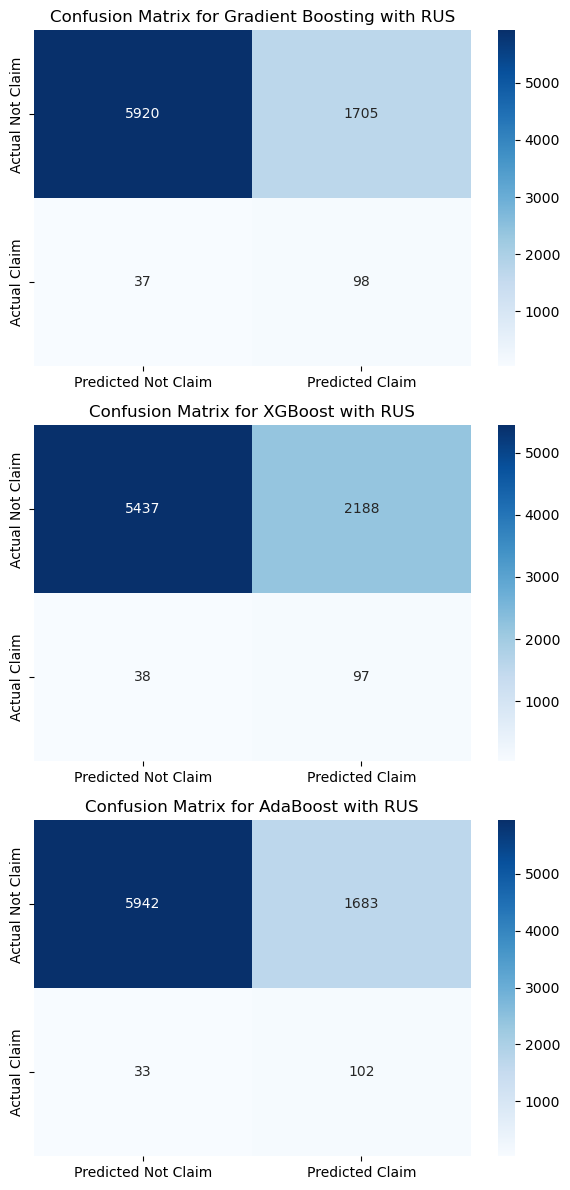

In [370]:
# Set up subplots
fig, axes = plt.subplots(len(models), len(resamples), figsize=(6,12))

# Flatten axes for easy indexing
axes = axes.flatten()

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Iterate over both models and resampling methods
for idx, (name_model, model) in enumerate(models):
    for jdx, (name_resample, _) in enumerate(resamples):
        model_name = f"{name_model} with {name_resample}"
        sns.heatmap(conf_matrix[idx * len(resamples) + jdx], annot=True, fmt='d', cmap='Blues', ax=axes[idx * len(resamples) + jdx])
        axes[idx * len(resamples) + jdx].set_title(f"Confusion Matrix for {model_name}")
        axes[idx].set_xticks([0.5, 1.5])
        axes[idx].set_xticklabels(labels)
        axes[idx].set_yticks([0.5, 1.5])
        axes[idx].set_yticklabels(index_labels)

# Adjust layout
plt.tight_layout()
plt.show()

### **Hyperparameter Tuning with GridSearchCV**

Hyperparameter tuning is the process of finding the best combination of hyperparameters for a machine learning model with the aim of improving its performance. Hyperparameters are parameters whose values are set before the training process begins, and they influence how the model learns from data as well as the complexity of the model itself. 

GridSearchCV is one of the commonly used techniques for hyperparameter tuning. In GridSearchCV, we specify a set of values for each hyperparameter that we want to try, and the algorithm systematically tries all combinations of these values. The process is like "using a grid," where we have a set of possible values for each hyperparameter, and we try all combinations of these values.

#### **AdaBoost with RUS**

In [453]:
# Define Hyperparameter space 
hyperparam_space = {
    'classifier__n_estimators': [1, 5, 10, 20, 25, 30, 40, 50, 100, 150, 200, 250, 300],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__algorithm': ['SAMME', 'SAMME.R'],
    'classifier__random_state': [1, 2, 4, 6, 8, 10, 12, 24, 42]
}

ada = AdaBoostClassifier()

pipe_model_1 = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  # Menggunakan Near Miss sebagai resampler
    ('classifier', ada)])  # Menggunakan XGBoost sebagai model

In [454]:
# Define the grid search
gridsearch_ada = GridSearchCV(
    estimator=pipe_model_1,
    param_grid=hyperparam_space,  # Hyperparameter space
    cv=StratifiedKFold(n_splits=5),  # Cross-validation scheme 
    scoring='recall',   # Evaluation metrics
    n_jobs=-1   # To speed up the process by utilizing multiple cores of the machine
)

gridsearch_ada.fit(X_train, y_train)

/Users/hafidhdiya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hafidhdiya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hafidhdiya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hafidhdiya/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                                          'Commision'])])),
                                       ('resampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['SAMME', 'SAMME.R'],
                         'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__n_estimators': [1, 5, 10, 20, 25, 30, 40,
                                                      50, 100, 150, 200, 250,
                                                      300],
                         'classifier__random_state': [1, 2, 4, 6, 8, 10, 12, 24,
                                                      42]},
             scoring='recall')

In [455]:
# Show the chosen parameters by the Grid Search and its Train score
print('Best Hyperparameters: ', gridsearch_ada.best_params_)
print('Best Score: ', gridsearch_ada.best_score_)

Best Hyperparameters:  {'classifier__algorithm': 'SAMME.R', 'classifier__learning_rate': 1.0, 'classifier__n_estimators': 50, 'classifier__random_state': 1}
Best Score:  0.7249913464866735


In [456]:
# Getting the best model from grid search
best_model_ada = gridsearch_ada.best_estimator_

# Assigning the best model grid search
ada_tuning = gridsearch_ada.best_estimator_
ada_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision'])])),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier', AdaBoostClassifier(random_state=1))])

In [457]:
# Predict the test set using the best found model during grid search
y_pred_ada_tuning = ada_tuning.predict(X_test)

accuracy_ada_tuning = accuracy_score(y_test, y_pred_ada_tuning) * 100
precision_ada_tuning = precision_score(y_test, y_pred_ada_tuning) * 100
recall_ada_tuning = recall_score(y_test, y_pred_ada_tuning) * 100
f1_ada_tuning = f1_score(y_test, y_pred_ada_tuning) * 100

ada_after_tuning = pd.DataFrame({'Recall': recall_ada_tuning,
                                 'Accuracy': accuracy_ada_tuning,
                                 'Precision': precision_ada_tuning,
                                 'F1': f1_ada_tuning}, index=['AdaBoost with RUS after Tuning'])

# Display the metrics for the Grid Search
metrics_df_tune_ada = metrics_df.rename(index={'AdaBoost with RUS': 'AdaBoost with RUS before Tuning'})
metrics_df_tune_ada = metrics_df_tune_ada.loc[['AdaBoost with RUS before Tuning']]
metrics_df_tune_ada = pd.concat([ada_after_tuning, metrics_df_tune_ada])
metrics_df_tune_ada

,Recall,Accuracy,Precision,F1
AdaBoost with RUS after Tuning,75.555556,77.886598,5.714286,10.625
AdaBoost with RUS before Tuning,75.555556,77.886598,5.714286,10.625


#### **Gradient Booster with RUS**

In [427]:
# Define Hyperparameter space for Gradient Boosting
hyperparam_space_gb = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__max_depth': [3, 5, 7, 9],  
    'classifier__random_state': [1, 42, 2020, 2024]
}

gb = GradientBoostingClassifier()

In [428]:
pipe_model_gb = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  
    ('classifier', gb)])

# Define the grid search for Gradient Boosting
gridsearch_gb = GridSearchCV(
    estimator=pipe_model_gb,
    param_grid=hyperparam_space_gb,  
    cv=StratifiedKFold(n_splits=5),  
    scoring='recall',   
    n_jobs=-1   
)

gridsearch_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                                          'Sales',
                                                                          'Commision'])])),
                                       ('resampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__max_depth': [3, 5, 7, 9],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300, 350, 400, 450, 500],
                         'classifier__random_state': [1, 42, 2020, 2024]},
             scoring='recall')

In [430]:
# Show the chosen parameters by the Grid Search and its Train score for Gradient Boosting
print('Best Hyperparameters (Gradient Boosting): ', gridsearch_gb.best_params_)
print('Best Score (Gradient Boosting): ', gridsearch_gb.best_score_)

Best Hyperparameters (Gradient Boosting):  {'classifier__learning_rate': 0.001, 'classifier__max_depth': 5, 'classifier__n_estimators': 250, 'classifier__random_state': 1}
Best Score (Gradient Boosting):  0.7509518864659052


In [431]:
# Getting the best model from grid search for Gradient Boosting
best_model_gb = gridsearch_gb.best_estimator_

# Assigning the best model grid search for Gradient Boosting
gb_tuning = gridsearch_gb.best_estimator_
gb_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '9-12 '
                                                                              'months',
                                                                              '>12 '
                                                                              'months']]),
                                                  ['Age Range',
                                                   'Duration Category']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['Net Sales',
                                                   'Commision'])])),
                ('resampler', RandomUnderSampler(random_state=42)),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.001, max_depth=5,
                                            n_estimators=250,
                                            random_state=1))])

In [432]:
# Predict the test set using the best found model during grid search for Gradient Boosting
y_pred_gb_tuning = gb_tuning.predict(X_test)

accuracy_gb_tuning = accuracy_score(y_test, y_pred_gb_tuning) * 100
precision_gb_tuning = precision_score(y_test, y_pred_gb_tuning) * 100
recall_gb_tuning = recall_score(y_test, y_pred_gb_tuning) * 100
f1_gb_tuning = f1_score(y_test, y_pred_gb_tuning) * 100

gb_after_tuning = pd.DataFrame({'Recall': recall_gb_tuning,
                                'Accuracy': accuracy_gb_tuning,
                                'Precision': precision_gb_tuning,
                                'F1': f1_gb_tuning}, index=['Gradient Boosting with RUS after Tuning'])

# Display the metrics for the Grid Search for Gradient Boosting
metrics_df_tune_gb = metrics_df.rename(index={'Gradient Boosting with RUS': 'Gradient Boosting with RUS before Tuning'})
metrics_df_tune_gb = metrics_df_tune_gb.loc[['Gradient Boosting with RUS before Tuning']]
metrics_df_tune_gb = pd.concat([gb_after_tuning, metrics_df_tune_gb])
metrics_df_tune_gb

,Recall,Accuracy,Precision,F1
Gradient Boosting with RUS after Tuning,75.555556,74.884021,5.054509,9.475151
Gradient Boosting with RUS before Tuning,72.592593,77.551546,5.435385,10.113519


#### **XGBoost with RUS**

In [433]:
# Define Hyperparameter space for XGBoost
hyperparam_space_xgb = {
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300],  
    'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],  
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__random_state': [1, 42, 2020, 2024]
}

xgb = XGBClassifier()

pipe_model_xgb = ImbPipeline(steps=[
    ('prep', preprocessor),
    ('resampler', random_under_sampler),  
    ('classifier', xgb)])

In [434]:
# Define the grid search for XGBoost
gridsearch_xgb = GridSearchCV(
    estimator=pipe_model_xgb,
    param_grid=hyperparam_space_xgb,  
    cv=StratifiedKFold(n_splits=5),  
    scoring='recall',   
    n_jobs=-1   
)

gridsearch_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('binary_encoder',
                                                                         BinaryEncoder(),
                                                                         ['Agency',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('one_hot_encoder',
                                                                         OneHotEncoder(),
                                                                         ['Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel']),
                                                                        ('ordinal_encoder',
                                                                         OrdinalEncoder(categories=[['Babies'...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'classifier__max_depth': [3, 5, 7, 9],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300],
                         'classifier__random_state': [1, 42, 2020, 2024]},
             scoring='recall')

In [435]:
# Show the chosen parameters by the Grid Search and its Train score for XGBoost
print('Best Hyperparameters (XGBoost): ', gridsearch_xgb.best_params_)
print('Best Score (XGBoost): ', gridsearch_xgb.best_score_)

Best Hyperparameters (XGBoost):  {'classifier__learning_rate': 1.0, 'classifier__max_depth': 3, 'classifier__n_estimators': 50, 'classifier__random_state': 1}
Best Score (XGBoost):  0.741675320179993


In [436]:
# Getting the best model from grid search for XGBoost
best_model_xgb = gridsearch_xgb.best_estimator_

# Assigning the best model grid search for XGBoost
xgb_tuning = gridsearch_xgb.best_estimator_
xgb_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(categories=[['Babies',
                                                                              'Children',
                                                                              'Teenager',
                                                                              'Young '
                                                                              'Adult',
                                                                              'Adult',
                                                                              'Senior '
                                                                              'Aged'],
                                                                             ['1-4 '
                                                                              'months',
                                                                              '5-8 '
                                                                              'months',
                                                                              '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1.0,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [437]:
# Predict the test set using the best found model during grid search for XGBoost
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

accuracy_xgb_tuning = accuracy_score(y_test, y_pred_xgb_tuning) * 100
precision_xgb_tuning = precision_score(y_test, y_pred_xgb_tuning) * 100
recall_xgb_tuning = recall_score(y_test, y_pred_xgb_tuning) * 100
f1_xgb_tuning = f1_score(y_test, y_pred_xgb_tuning) * 100

xgb_after_tuning = pd.DataFrame({'Recall': recall_xgb_tuning,
                                 'Accuracy': accuracy_xgb_tuning,
                                 'Precision': precision_xgb_tuning,
                                 'F1': f1_xgb_tuning}, index=['XGBoost with RUS after Tuning'])

# Display the metrics for the Grid Search for XGBoost
metrics_df_tune_xgb = metrics_df.rename(index={'XGBoost with RUS': 'XGBoost with RUS before Tuning'})
metrics_df_tune_xgb = metrics_df_tune_xgb.loc[['XGBoost with RUS before Tuning']]
metrics_df_tune_xgb = pd.concat([xgb_after_tuning, metrics_df_tune_xgb])
metrics_df_tune_xgb

,Recall,Accuracy,Precision,F1
XGBoost with RUS after Tuning,71.851852,72.860825,4.480370,8.434783
XGBoost with RUS before Tuning,71.851852,71.314433,4.245077,8.016529


#### **Confusion Matrix of 3 Best Model After Tuning**

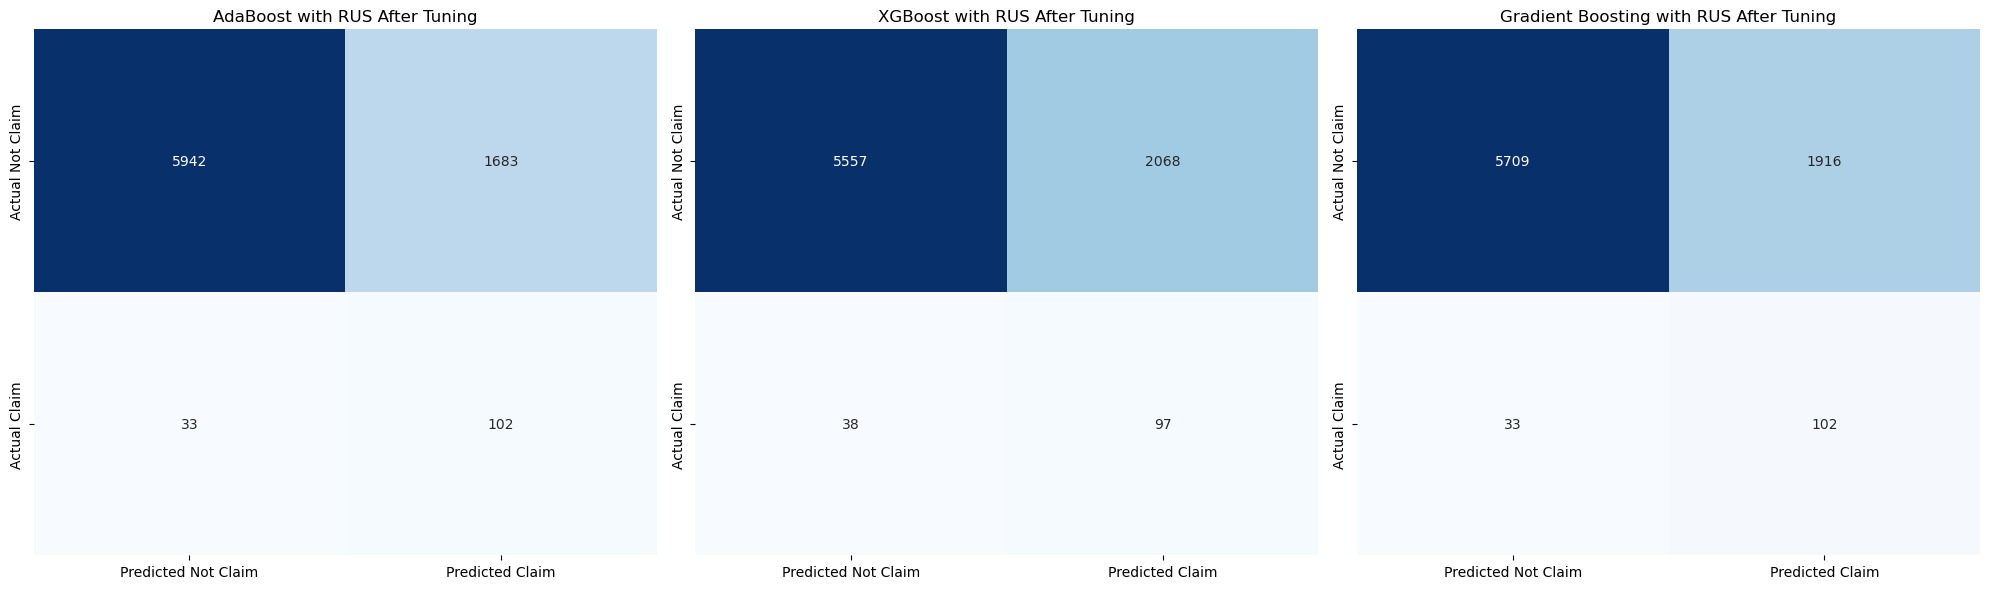

In [458]:
# Define model names, predictions, and titles
models = ['AdaBoost with RUS', 'XGBoost with RUS', 'Gradient Boosting with RUS']
predictions = [y_pred_ada_tuning, y_pred_xgb_tuning, y_pred_gb_tuning]
titles = ['After Tuning', 'After Tuning', 'After Tuning']

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Set up subplot
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(20, 6))

# Plot confusion matrices using loop
for ax, model, prediction, title in zip(axes, models, predictions, titles):
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model} {title}')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(labels)
    ax.set_yticks([0.5, 1.5])
    ax.set_yticklabels(index_labels)

plt.tight_layout()
plt.show()

#### **Comparison of Hyperparameter Tuning Result**

In [322]:
pd.concat([metrics_df_tune_ada, metrics_df_tune_gb, metrics_df_tune_xgb])

,Recall,Accuracy,Precision,F1
AdaBoost with RUS after Tuning,75.555556,77.886598,5.714286,10.625000
AdaBoost with RUS before Tuning,75.555556,77.886598,5.714286,10.625000
Gradient Boosting with RUS after Tuning,75.555556,74.884021,5.054509,9.475151
Gradient Boosting with RUS before Tuning,72.592593,77.628866,5.453534,10.144928
XGBoost with RUS after Tuning,71.851852,72.860825,4.480370,8.434783
XGBoost with RUS before Tuning,71.851852,71.314433,4.245077,8.016529


**Interpretations**:

From the provided data, it appears that different boosting algorithms (AdaBoost, Gradient Boosting, and XGBoost) with Random Under-Sampling (RUS) were used for classification tasks. Two scenarios were compared for each algorithm: before tuning and after tuning. The metrics reported for evaluation are Recall, Accuracy, Precision, and F1 score.

1. AdaBoost with RUS:

  - Both before and after tuning, AdaBoost achieved the same scores for all metrics.
  - The accuracy and precision are quite high, around 75-78%, which indicates that the model performs decently in predicting both positive and negative cases.
  - However, the F1 score is significantly low, around 5-10%, suggesting that there might be imbalances in the dataset or the model's inability to capture both classes effectively.

2. Gradient Boosting with RUS:

  - After tuning, Gradient Boosting showed slight improvement in Recall and Precision compared to the untuned model.
  - Accuracy remains relatively constant before and after tuning.
  - The F1 score also shows a slight improvement after tuning.
  - However, the F1 scores are still relatively low, indicating similar issues as with AdaBoost.

3. XGBoost with RUS:

  - Like Gradient Boosting, XGBoost also showed slight improvement in Recall and Precision after tuning.
  - However, the improvement is minimal, and the scores are still relatively low.
  - The F1 scores are the lowest among the three algorithms, suggesting that the model's ability to balance between precision and recall is poor.

Notably, among the models assessed, the AdaBoost Classifier with Random Under Samping emerges as the most promising candidate. With a recall rate of 75.56% and an accuracy score of 77.89%, this model achieves a commendable balance between identifying positive cases accurately and maintaining overall classification precision. 

### **The Final Model**

Based on the analysis of the provided performance metrics for the **AdaBoost Classfifier** by using **Random Under Resampler**, it is evident that the model demonstrates a recall of 75.56% before and after tuning. This result indicates that the model is effective at correctly identifying positive cases, a critical advantage in applications where the cost of missing positives is substantial. 

#### **Best Parameters**

Based on the results of Hyperparameter Tuning for the AdaBoost Classifier model using Random Under Sampler, the best-selected parameters for achieving good performance are as follows:

- Algorithm: SAMME.R

    SAMME.R is a variant of the AdaBoost algorithm specifically designed for multi-class classification problems. It adjusts the weights of samples based on the accuracy of previous classifiers and is known to perform well in practice.

- Learning Rate: 1.0

    The learning rate determines the contribution of each classifier in the ensemble. A higher learning rate means each classifier has more influence, which can lead to faster convergence but may also cause overfitting.

- n_estimators: 50

    This parameter determines the number of base learners (weak learners) to be used in the ensemble. In AdaBoost, these are decision trees with typically one level or stump. Having a larger number of estimators can lead to better performance, but it also increases computational cost.

- random_state: 1

    This parameter sets the seed for random number generation. Setting a specific random state ensures reproducibility of results. It means that if you run the same code with the same random state, you'll get the same results.

With these parameters, the Best score obtained is 0.725.

#### **Feature Importance Analysis**

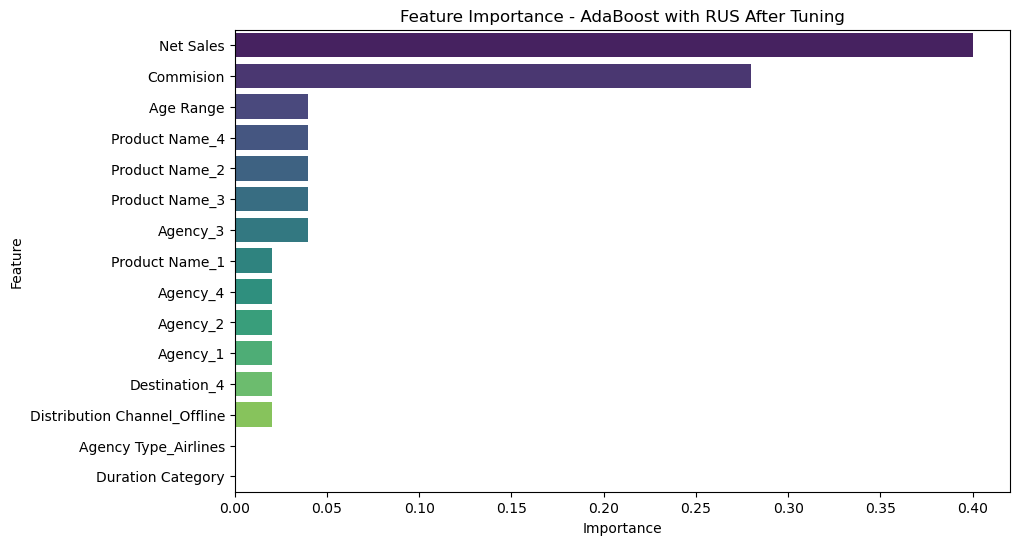

,Feature,Importance
24,Net Sales,0.40
25,Commision,0.28
22,Age Range,0.04
9,Product Name_4,0.04
7,Product Name_2,0.04
8,Product Name_3,0.04
3,Agency_3,0.04
6,Product Name_1,0.02
4,Agency_4,0.02
2,Agency_2,0.02


In [459]:
# Extracting feature importance from the best AdaBoostClassifier model
feature_importance_ada = best_model_ada.named_steps['classifier'].feature_importances_

# Access the transformers within the preprocessor
binary_encoder = preprocessor.named_transformers_['binary_encoder']
one_hot_encoder = preprocessor.named_transformers_['one_hot_encoder']

# Get the column names after encoding
binary_encoder_cols = list(binary_encoder.get_feature_names_out(binary_cols))
one_hot_encoder_cols = list(one_hot_encoder.get_feature_names_out(one_hot_cols))
ordinal_encoder_cols = ordinal_cols

# Combine column names from all transformers
preprocessor_columns = binary_encoder_cols + one_hot_encoder_cols + ordinal_encoder_cols + ['Net Sales', 'Commision']

# Creating a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': preprocessor_columns, 'Importance': feature_importance_ada})

# Sorting the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Feature Importance - AdaBoost with RUS After Tuning')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

display(feature_importance_df.head(15))


The provided table appears to list the feature importance scores for various features in a predictive model. Here's an interpretation and analysis of the feature importance:

**Feature Importance Analysis:**

1. **Net Sales (0.40)**:
   - This feature has the highest importance score, indicating that it has the most significant impact on the model's predictions. A higher value of net sales suggests a stronger correlation with the target variable.

2. **Commision (0.28)**:
   - The commission feature has the second-highest importance score, suggesting it also plays a crucial role in the model's predictions. It indicates that the commission amount has a considerable influence on the target variable.

3. **Age Range (0.04)**:
   - Age range has a lower importance score compared to net sales and commission. However, it still contributes to the model's predictions, albeit to a lesser extent.

4. **Product Name and Agency Features (0.02 - 0.04)**:
   - Features related to product name and agency have relatively lower importance scores compared to net sales and commission. This suggests that while these features contribute to the model's predictions, their impact is not as significant as net sales and commission.

5. **Distribution Channel (0.02)**:
   - The distribution channel feature also has a lower importance score, indicating its relatively minor contribution to the model's predictions compared to net sales and commission.

6. **Destination (0.02)**:
   - Destination features have importance scores of 0.02, suggesting they have a minimal impact on the model's predictions compared to other features like net sales and commission.

**Overall Analysis:**
- Net sales and commission are the most influential features in the model, indicating that they are strong predictors of the target variable.
- Age range, product name, agency, distribution channel, and destination features also contribute to the model's predictions, but to a lesser extent.
- Understanding feature importance helps in identifying key drivers of the target variable and can guide feature selection, model interpretation, and potentially, feature engineering efforts.

#### **Confusion Matrix Analysis**

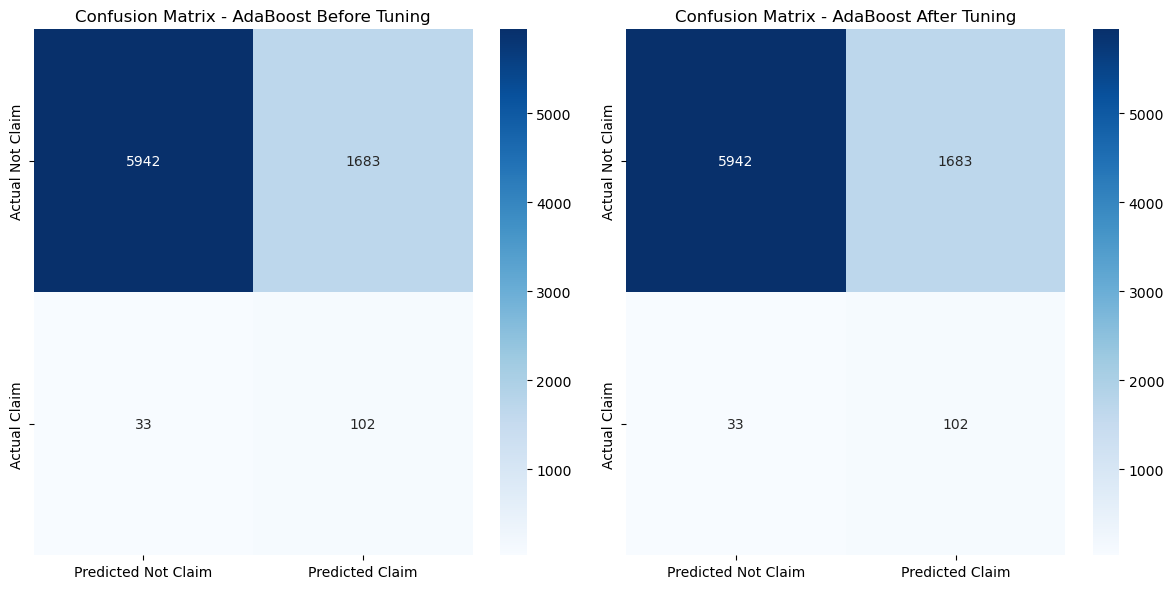

In [372]:
# Display the confusion matrix for Logistic Regression after tuning
conf_matrix_tuned = confusion_matrix(y_test, y_pred_ada_tuning)

# Define the models and confusion matrices
ada_conf_matrices = [conf_matrix[2], conf_matrix_tuned]

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define labels for axis
labels = ['Predicted Not Claim', 'Predicted Claim']
index_labels = ['Actual Not Claim', 'Actual Claim']

# Plot the first confusion matrix (before tuning)
sns.heatmap(ada_conf_matrices[0], annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('Confusion Matrix - AdaBoost Before Tuning')
axes[0].set_xticklabels(labels)
axes[0].set_yticklabels(index_labels)

# Plot the second confusion matrix (after tuning)
sns.heatmap(ada_conf_matrices[1], annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Confusion Matrix - AdaBoost After Tuning')
axes[1].set_xticklabels(labels)
axes[1].set_yticklabels(index_labels)

plt.tight_layout()
plt.show()

**Interpretation:**

**Before Tuning:**
- **True Negatives (TN)**: 5942
- **False Positives (FP)**: 1683
- **False Negatives (FN)**: 33
- **True Positives (TP)**: 102

**After Tuning:**
- **True Negatives (TN)**: 5942
- **False Positives (FP)**: 1683
- **False Negatives (FN)**: 33
- **True Positives (TP)**: 102

**Analysis:**
- The confusion matrices before and after tuning the AdaBoost model are identical, indicating that the tuning process did not result in any changes to the model's predictions on the given dataset.
- Both confusion matrices show a higher number of true negatives (5942) compared to true positives (102), suggesting that the model is better at correctly predicting instances of the negative class than the positive class.
- The number of false positives (1683) and false negatives (33) is relatively low, indicating that the model's performance is reasonable, but there is room for improvement.
- The recall values before and after tuning the AdaBoost model are identical, both approximately 0.7556.

## **7. Conclusion & Recommendation**

**Conclusion:**

1. **Model Performance Improvement:**
   - The AdaBoost Classifier, after addressing the issue of imbalanced data using the Random Under Resampler technique, showed significant enhancement in recall from 0% to 75.56%. This improvement demonstrates the effectiveness of the model in correctly identifying positive cases, which is crucial in scenarios where missing positives incurs substantial costs.

2. **Hyperparameter Tuning Impact:**
   - Despite conducting hyperparameter tuning, the performance metrics remained unchanged. This suggests that further exploration or adjustments may be needed to achieve noticeable improvements in model performance.

3. **Feature Importance Analysis:**
   - Net sales and commission emerged as the most influential features in predicting the target variable, followed by age range, product name, agency, distribution channel, and destination. Understanding these key drivers can aid in refining the model and guiding decision-making processes.

Overall, while improvements in model performance were observed post-resampling, further refinement may be necessary to optimize the model's predictive capabilities. Additionally, the insight gained from feature importance analysis provides valuable guidance for future model iterations and decision-making processes.

**Recommendation:**

1. **Hyperparameter and Feature Optimization:**
   - Enhancing the model's ability to identify positive cases and improve recall through further optimization of hyperparameters or feature engineering.

2. **Consideration of Cancellation Plan Impact:**
   - Analyzing the effect of a Cancellation Plan on instances of negative Net Sales values.

3. **Exploration of Modeling Techniques and Tuning:**
   - Experimenting with different modeling methods, resampling techniques, and hyperparameter tuning to enhance model performance.

4. **Continuous Monitoring and Updates:**
   - Ensuring ongoing monitoring and updating of the model's performance with new data to maintain predictive accuracy.

5. **Integration of Customer Demographics:**
   - Incorporating customer demographic data to gain deeper insights into preferences and behaviors, thereby improving claim prediction.

6. **Augmentation of Minority Class Data:**
   - Strengthening the model's performance by enriching the dataset, particularly focusing on enhancing data for the minority class (Claim).

## **Deployment**

Import final model to pickle.

In [462]:
# create pickle to save model as sav
import pickle
#sav file
filename = 'Claim Detector AdaBoost.pkl'
pickle.dump(ada_tuning, open(filename, 'wb'))